# Proyecto aplicado: "Heart Failure Prediction Dataset"
* Andrés Forero
* Daniel Cuellar
* Daniela González

## Librerías 
______

In [113]:
# manejo de data
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import statsmodels.api as sm

# visualización
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Metodología CRISP-DM
___

![Imagen](http://www.iic.uam.es/wp-content/uploads/2021/11/CRISP-DM.jpg)

## Situación actual

Según la Organización Mundial de la Salud “las enfermedades cardiovasculares son la primera causa de muerte en todo el mundo; provocan la muerte de 17,9 millones de personas al año y son responsables del 32% de las defunciones de todo el planeta, con una tasa bruta de mortalidad de 253 casos por 100.000 habitantes”.
De la misma forma, el 80% de las muertes se podrían evitar con una atención primaria de patologías crónicas como la diabetes, hipertensión, dislipidemias (altos niveles de colesterol) y obesidad. 
Algunos de los síntomas dependen del tipo de enfermedad cardíaca que se tenga, pero con frecuencia, según la Clínica Mayo suelen ser:
- Dolor en el pecho.
- Desmayos (síncope).
- Fatiga.
- Latidos irregulares del corazón.
- Falta de aire.
- Hinchazón de los pies o los tobillos.

Lo más preocupante es que es posible que no sepa que tiene una enfermedad cardíaca hasta que tenga una complicación, como un ataque al corazón; por ello es importante generar conciencia en las personas sobre las enfermedades crónicas desde la prevención,  para lograr hábitos  saludables, y los controles médicos necesarios de acuerdo a cada etapa de la vida que ayuden a tener una vida plena y de buena calidad.


[Ref_1](https://www.vademecum.es/noticia-230314-Las+enfermedades+cardiovasculares+son+la+primera+causa+de+muerte+en+Espa+ntilde+a+y+en+Europa_17478), [Ref_2](https://www.larepublica.net/noticia/enfermedades-cardiovasculares-y-riesgo-de-muerte-aumentan-considerablemente-por-desatencion-de-padecimientos-cronicos), [Ref_3](https://www.elpais.com.uy/bienestar/vida-sana/las-principales-causas-de-las-enfermedades-cardiovasculares-y-los-sintomas-a-los-que-prestar-atencion)

## Descripción del dataset
_______________

Dataset obtenido de kaggle [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction).


Según la fuente, este conjunto de datos fue creado mediante la combinación de diferentes conjuntos de datos disponibles de forma independiente pero que no se habían combinado antes. 

Para ello, fueron usados **cinco** conjuntos de datos cardíacos, con 11 características comunes, lo que lo convierte en uno de los conjunto de datos de enfermedades cardíacas más grande disponible para fines de investigación. 

Los cinco conjuntos de datos utilizados son:
* Cleveland: 303 observaciones
* Húngaro: 294 observaciones
* Suiza: 123 observaciones
* Long Beach VA: 200 observaciones
* Conjunto de datos de Stalog (corazón): 270 observaciones

Siendo un total de **1190 observaciones** y  **272 duplicados**, para un dataset final de **918 observaciones**.


## Problema
_____


Debido a que el propósito principal del dataset es crear modelos predictivos, se desea entender el dataset y adicionalmente evaluar si las variables recolectadas, por defecto, requieren un trabajo adicional de limpieza y estructura, con el fin de servir como entradas apropiadas para un modelo predictivo.

## Objetivos
_____

### General

Analizar variables predictoras relacionadas con el padecimiento de enfermedad cardíaca.

### Específico 

* Entender el conjunto de datos por medio de visualización y estadística descriptiva.

* Identificar las variables clínicas que más se relacionan y que podrían predecir la presencia de enfermedad cardíaca.

* Determinar qué variables del conjunto de datos son significativas para crear un modelo de regresión a partir de los datos.



## Hipótesis (científica o estadística)
------

* ¿Existe una diferencia significativa entre las medias de las variables, dependiendo si tienen o no enfermedad cardíaca *(HeartDisease 0 o 1)*?


# Entendimiento de los datos
----

## Carga De Datos
------

In [114]:
data = pd.read_csv(".\\Data\\heart.csv")

## Describir los datos 
------

Los campos del dataset se describen a continuación:

|Variable|Definición |Valores|
|---|---|---|
|Age|Edad del paciente|Años|
|Sex|Sexo del paciente|M: Masculino, F: Femenino|
|ChestPainType|Tipo de dolor torácico|TA: angina típica, ATA: angina atípica, NAP: dolor no anginoso, ASY: asintomático|
|RestingBP|Presión arterial en reposo. BP (blood pressure)|Rango de 60-200 mm Hg|
|Cholesterol|Colesterol sérico |Rango de 120-600 mg/dl|
|FastingBS|Azúcar en sangre en ayunas. BS(Blood sugar) |1: si BS en ayunas > 120 mg/dl, 0: en caso contrario|
|RestingECG|Resultados del electrocardiograma (ECG) en reposo|Normal: normal, ST: con anomalías en la onda ST-T depresión > 0,05 mV), HVI: hipertrofia ventricular izquierda|
|MaxHR|Frecuencia cardíaca máxima alcanzada (capacidad cardíaca)|Rango entre 60-202|
|ExerciseAngina|Dolor de pecho inducido por el ejercicio|Y: Si, N: No|
|Oldpeak|Elevación o Depresión en el electrocardiograma del segmento ST| Valor numérico de 0 a 6.2|
|ST_Slope|Pendiente del segmento ST del ejercicio máximo|UP: pendiente ascendente, Flat: plana, Down: pendiente descendente|
|HeartDisease|Enfermedad cardíaca|0: sin enfermedad cardíaca, 1: con enfermedad cardíaca|

<details>    
<summary>
    <font size="3" ><b>Rangos comunes</b></font>
</summary>
<p>

Para determinar los filtros a aplicar se buscó información sobre los rangos de las variables, para mayor información consultar 
[Link_1](https://www.hindawi.com/journals/cmmm/2017/8272091/tab1/), [Link_2](https://gndec.ac.in/~jagdeepmalhi/ihdps/).


</p>

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


A primera vista se tienen 7 variables númericas y 5 categóricas.

In [116]:
data.describe().round(2)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.00,918.00,918.00,918.00,918.00,918.00,918.00
mean,53.51,132.40,198.80,0.23,136.81,0.89,0.55
std,9.43,18.51,109.38,0.42,25.46,1.07,0.50
min,28.00,0.00,0.00,0.00,60.00,-2.60,0.00
25%,47.00,120.00,173.25,0.00,120.00,0.00,0.00
50%,54.00,130.00,223.00,0.00,138.00,0.60,1.00
75%,60.00,140.00,267.00,0.00,156.00,1.50,1.00
max,77.00,200.00,603.00,1.00,202.00,6.20,1.00


* La variable "Cholesterol" presenta una alta desviación estándar y valores fuera del rango consultado(120-600).

* Para "FastingBS" se registran valores binarios, por ende debería ser considerada como categórica.

* Oldpeak, por su parte, tiene valores negativos los cuales están por debajo del rango mínimo(0). 

## Estadística exploratoria
------

In [117]:
# ajuste de categoricas que están como númerica

data = data.astype({'FastingBS':'string'})

def est_exploratoria(data,categoricas):
    """
    tablas de estadística exploratoria
    ---
    data : dataframe
    categoricas : lista con nombre de variables a tratar como categoricas
    
    """
    datos = data.loc[:,~data.columns.isin(categoricas)]

    df0 = datos.agg([lambda x : sum(x.isna()),"count",]).rename(index={"<lambda>": 'Na count'})
    df1 = datos.agg(["mean"])
    df2 = datos.agg(lambda x:pd.Series.mode(x)).rename(index={0: 'mode'})
    df3 = datos.agg(["median","std","var","kurt","skew","max","min"])

    df = pd.DataFrame().append([df0,df1,df2, df3])

    df["Measurement"] = df.index
    df["Type"]=["Structure","Structure","Central t.","Central t.","Central t.","Dispersion","Dispersion","Shape","Shape","Range","Range"]
    df.set_index("Type", append=False, inplace=True)
    df.set_index("Measurement", append=True, inplace=True)

    numerica=df.round(decimals=2)

    datos = data.loc[:,data.columns.isin(categoricas)]
    datos = datos.astype({'HeartDisease':'string'})

    df0 = datos.agg([lambda x : sum(x.isna())]).rename(index={"<lambda>": 'Na count'})

    df = pd.DataFrame().append([df0,datos.describe(include=['object',"string"])])

    categorica=df.round(decimals=2)
    return numerica, categorica

numerica, categorica = est_exploratoria(data,['Sex',"ChestPainType","RestingECG","ExerciseAngina","ST_Slope","HeartDisease","FastingBS"])

numerica


Age  RestingBP  Cholesterol   MaxHR  Oldpeak
Type       Measurement                                                 
Structure  Na count       0.00       0.00         0.00    0.00     0.00
           count        918.00     918.00       918.00  918.00   918.00
Central t. mean          53.51     132.40       198.80  136.81     0.89
           mode          54.00     120.00         0.00  150.00     0.00
           median        54.00     130.00       223.00  138.00     0.60
Dispersion std            9.43      18.51       109.38   25.46     1.07
           var           88.97     342.77     11964.89  648.23     1.14
Shape      kurt          -0.39       3.27         0.12   -0.45     1.20
           skew          -0.20       0.18        -0.61   -0.14     1.02
Range      max           77.00     200.00       603.00  202.00     6.20
           min           28.00       0.00         0.00   60.00    -2.60

* Se cambió el tipo de variable de "FastingBS" a categórica.
* No se presentan valores nulos ("Na") en el dataset.
* Se aprecia mejor la gran varianza en "Cholesterol".
* Podemos inferir que las variables poseen distribuciones no tan sesgadas dados los bajos valores de asimetría (skewness) y la proximidad de sus medias con sus medianas. 

In [118]:
categorica

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
Na count,0,0,0,0,0,0,0
count,918,918,918,918,918,918,918
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,725,496,704,552,547,460,508


* No se presentan valores nulos ("Na") en el dataset.
* El dataset en su mayoría está representado por hombres, personas sin azúcar en sangre tras ayuno (FastingBS) y gente con dolor de pecho asintomático (ASY).

## Visualización de datos
------

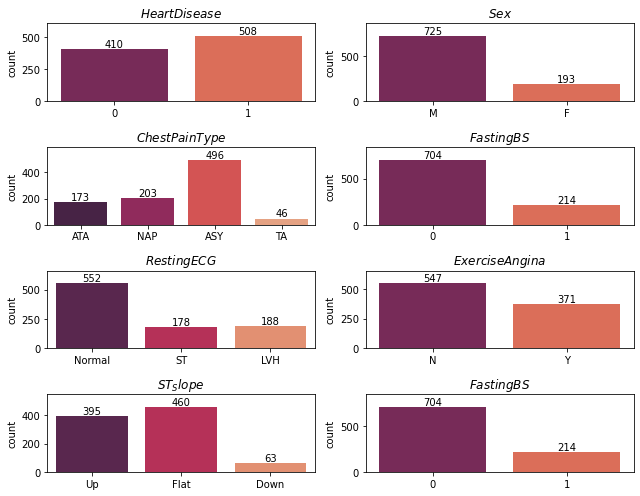

In [119]:

categoricas = ["HeartDisease",'Sex',"ChestPainType","FastingBS","RestingECG","ExerciseAngina","ST_Slope","FastingBS"]

fig_size=(4,2)

cont_cat=0

fig,ax = plt.subplots(nrows= fig_size[0],ncols=fig_size[1],figsize=(9,7))

for i in range(fig_size[0]):
    for j in range(fig_size[1]):

        ax[i,j] = plt.subplot2grid(fig_size, (i,j)) 
        ax[i,j] = sns.countplot(x=categoricas[cont_cat],data=data,palette="rocket")
        ax[i,j].set_xlabel("")
        ax[i,j].set_title(f"${categoricas[cont_cat]}$")
        ax[i,j].bar_label(ax[i,j].containers[0])
        ax[i,j].set_ylim(0,data[categoricas[cont_cat]].value_counts().max()*1.2)

        cont_cat+=1


fig.tight_layout()



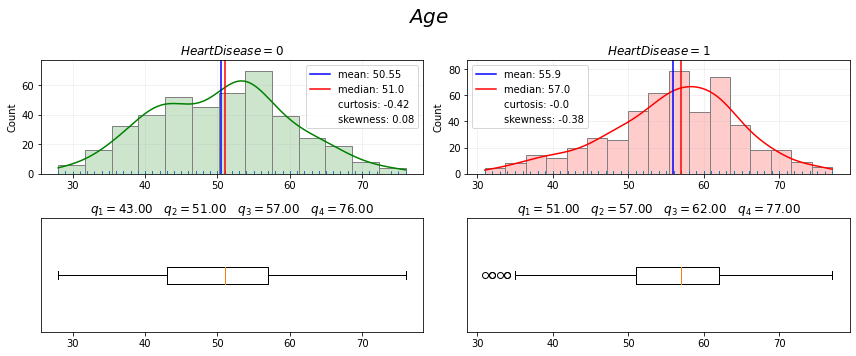

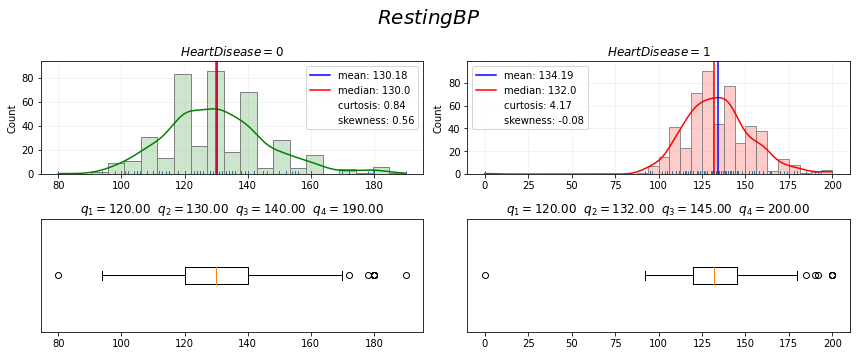

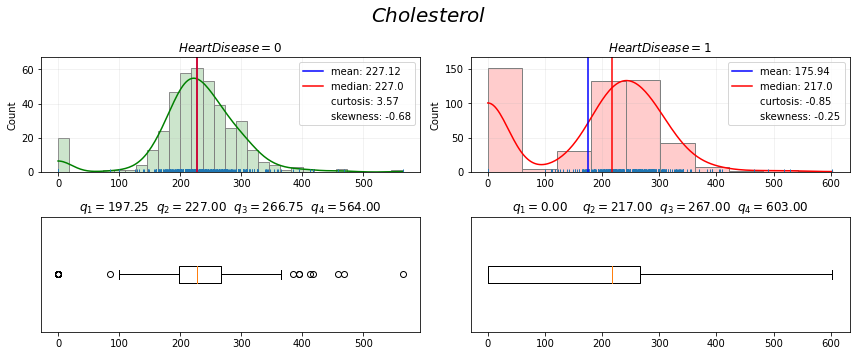

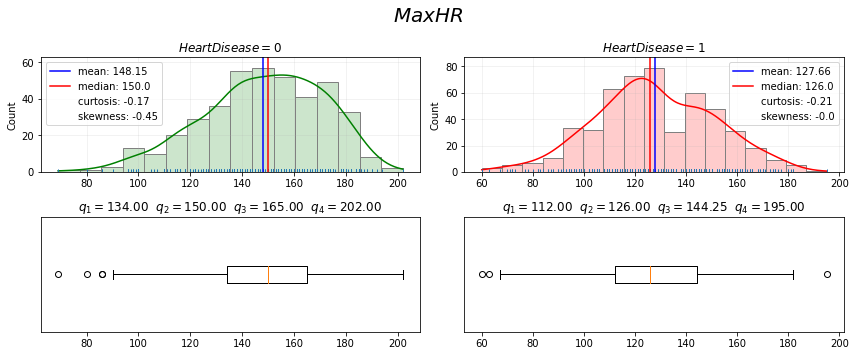

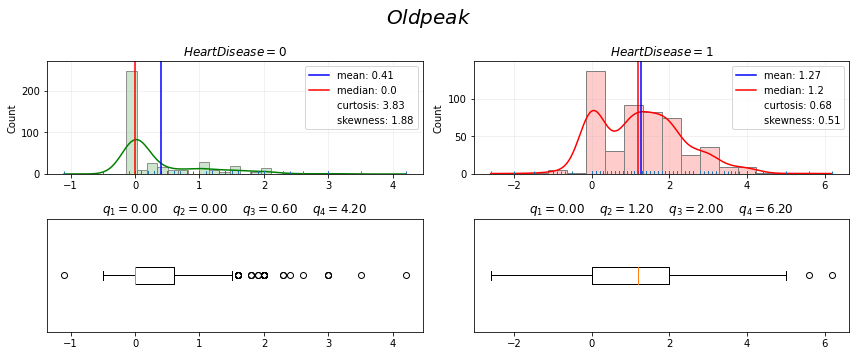

In [120]:
def shape_analysis(data,cols_categoricas):
    """ 
    data: dataframe
    cols_categoricas: lista con nombre de las columnas categoricas

    _______________________________________________________________

    imprime el análisis de forma de las variables númericas (el restante fuera de las categoricas) 


    """

    cols_numericas = data.columns[~data.columns.isin(cols_categoricas)]



    for n in [data.columns.get_loc(i) for i in cols_numericas]:

        caso_0= data[data.HeartDisease==0].iloc[:,[n]]
        caso_1= data[data.HeartDisease==1].iloc[:,[n]]


        fig, axes = plt.subplots(figsize=(12,5),nrows=2,ncols=2)

        fig.suptitle(f"${data.columns[n]}$",size=20)


        caso = caso_0

        #histograma
        # axes[0,0].hist(caso,color="g",alpha=0.2,edgecolor="gray");
        sns.histplot(caso.unstack(), kde=True,color="green",alpha=0.2,edgecolor="gray",ax=axes[0,0])
        sns.rugplot(caso.unstack(),ax=axes[0,0])
        axes[0,0].set_title("$HeartDisease = 0$")
        axes[0,0].grid("gray",alpha=0.2)

        #lineas y metricas
        axes[0,0].axvline([caso.mean()],label=f"mean: {round(caso.mean().item(),2)}",color="blue")
        axes[0,0].axvline([caso.median()],label=f"median: {round(caso.median().item(),2)}",color="red")

        axes[0,0].axvline([caso.mean()],label=f"curtosis: {round(sp.stats.kurtosis(caso).item(),2)}",color="none")
        axes[0,0].axvline([caso.mean()],label=f"skewness: {round(sp.stats.skew(caso).item(),2)}",color="none")
        axes[0,0].legend()


        #boxplot
        axes[1,0].boxplot(caso,vert=False)
        axes[1,0].yaxis.set_visible(False)

        textstr = '\t'.join((
            r'$q_{1}=%.2f$' % (np.quantile( caso,0.25),),
            r'$q_{2}=%.2f$' % (np.quantile( caso,0.50), ),
            r'$q_{3}=%.2f$' % (np.quantile( caso,0.75), ),
            r'$q_{4}=%.2f$' % (np.quantile( caso,1), )))

        axes[1,0].set_title(textstr)


        caso = caso_1

        #histograma
        # axes[0,1].hist(caso,color="r",alpha=0.2,edgecolor="gray")
        sns.histplot(caso.unstack(), kde=True,color="red",alpha=0.2,edgecolor="gray",ax=axes[0,1])
        sns.rugplot(caso.unstack(),ax=axes[0,1])  
        axes[0,1].set_title("$HeartDisease = 1$")
        axes[0,1].grid("gray",alpha=0.2)

        #lineas y metricas
        axes[0,1].axvline([caso.mean()],label=f"mean: {round(caso.mean().item(),2)}",color="blue")
        axes[0,1].axvline([caso.median()],label=f"median: {round(caso.median().item(),2)}",color="red")

        axes[0,1].axvline([caso.mean()],label=f"curtosis: {round(sp.stats.kurtosis(caso).item(),2)}",color="none")
        axes[0,1].axvline([caso.mean()],label=f"skewness: {round(sp.stats.skew(caso).item(),2)}",color="none")
        axes[0,1].legend()

        #boxplot
        axes[1,1].boxplot(caso,vert=False)
        axes[1,1].yaxis.set_visible(False)

        textstr = '\t'.join((
            r'$q_{1}=%.2f$' % (np.quantile( caso,0.25),),
            r'$q_{2}=%.2f$' % (np.quantile( caso,0.50), ),
            r'$q_{3}=%.2f$' % (np.quantile( caso,0.75), ),
            r'$q_{4}=%.2f$' % (np.quantile( caso,1), )))

        axes[1,1].set_title(textstr)



        fig.tight_layout()

categoricas =['Sex',"ChestPainType","RestingECG","ExerciseAngina","ST_Slope","FastingBS","HeartDisease"]

shape_analysis(data,categoricas)


* Se resalta una gran cantidad de valores atípicos para la variable "Cholesterol".

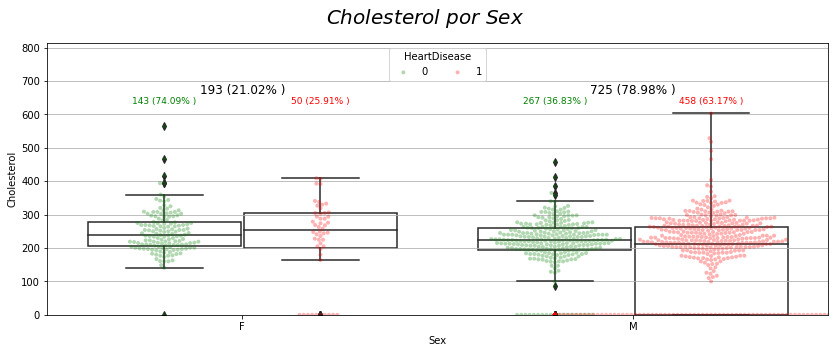

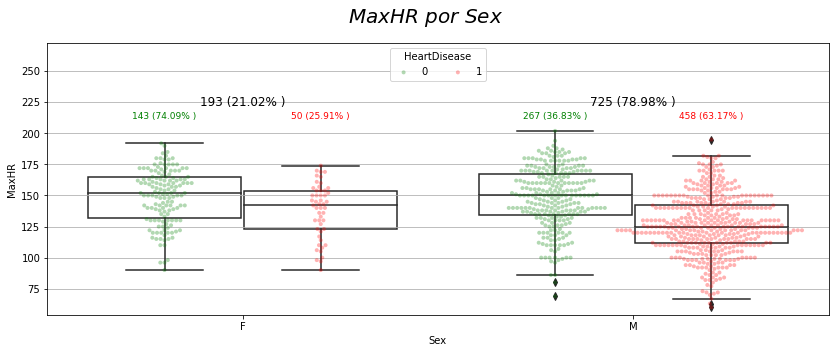

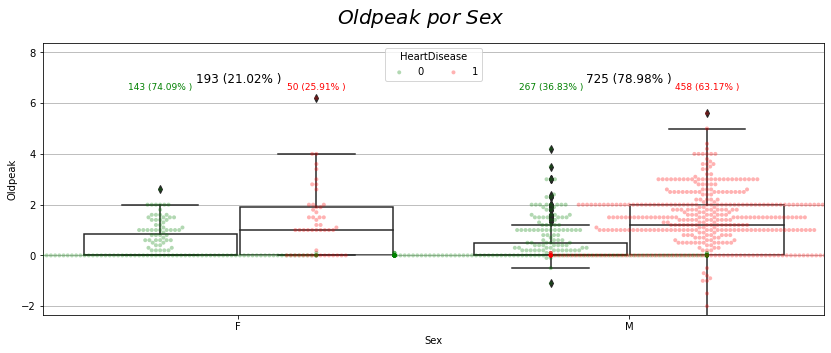

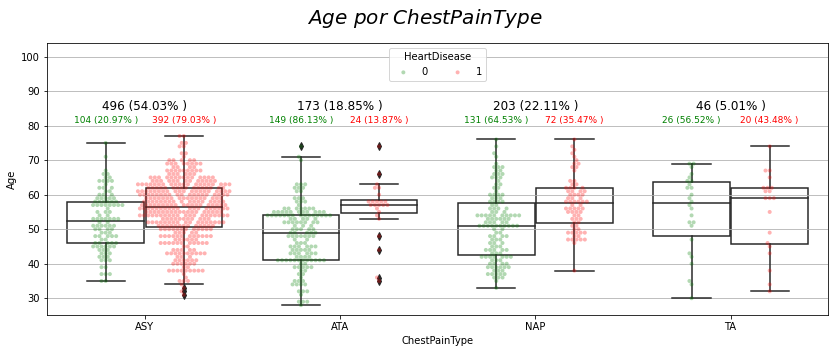

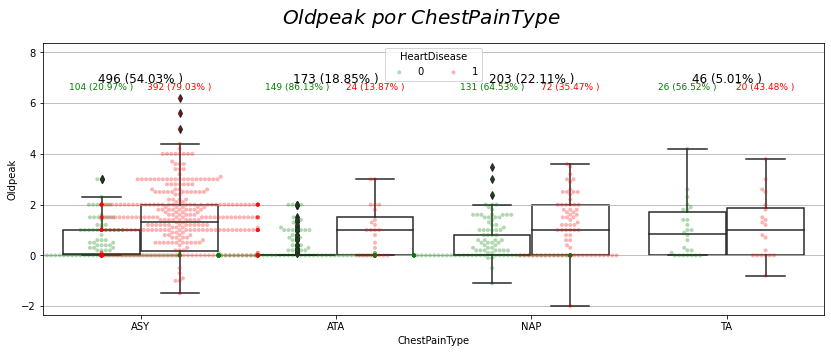

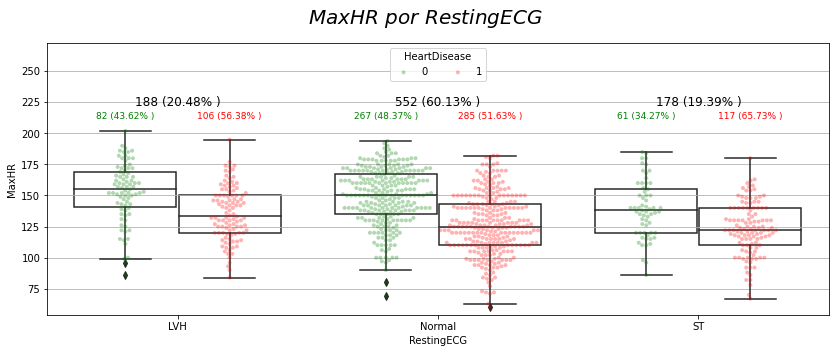

In [121]:
cols_categoricas =['Sex',"ChestPainType","RestingECG","ExerciseAngina","ST_Slope","FastingBS","HeartDisease"]
cols_numericas = data.columns[~data.columns.isin(cols_categoricas)]
cols_categoricas.remove("HeartDisease")

import warnings
warnings.filterwarnings('ignore')

def cat_plot (data,col_categorica,col_numerica):


    fig,ax = plt.subplots(figsize=(14,5))

    categorias=data[col_categorica].sort_values().unique()

    ax=sns.swarmplot(x =col_categorica, 
                y =col_numerica,
                palette=["green","red"],
                alpha=0.3,
                hue="HeartDisease",
                data = data,
                size = 4, # Disminuimos el tamaño de los puntos 
                dodge = True,order=categorias)
    
    
    ax=sns.boxplot(x =col_categorica, 
                y =col_numerica,
                palette=["green","red"],
                hue="HeartDisease",
                data = data,
                dodge = True,order=categorias,
                boxprops=dict(facecolor=(0,0,0,0)))
    
    

    fig.suptitle(f"${col_numerica}$ $por$ ${col_categorica}$",size=20)

    ax.grid(axis="y")
    cat_x = data[col_categorica].unique().shape[0]

    data_etiqueta = pd.crosstab(data[col_categorica], data["HeartDisease"], margins=True)

    y_min = data[col_numerica].min()
    y_max = data[col_numerica].max()

    ax.set_ylim(y_min*0.9,y_max*1.35)

    for i in range(cat_x):
        #general
        ax.annotate(text=f"{data_etiqueta.All[categorias[i]]} ({round((data_etiqueta.All[categorias[i]]/data_etiqueta.All.All)*100,2)}% )" ,
                    xy=(i,y_max*1.1),ha="center",size=12)
        #tipo 0
        ax.annotate(text=f"{data_etiqueta[0][categorias[i]]} ({round((data_etiqueta[0][categorias[i]]/data_etiqueta.All[categorias[i]])*100,2)}% )" ,
                    xy=(i-0.2,y_max*1.05),ha="center",color="green",size=9)
        
        #tipo 1
        ax.annotate(text=f"{data_etiqueta[1][categorias[i]]} ({round((data_etiqueta[1][categorias[i]]/data_etiqueta.All[categorias[i]])*100,2)}% )" ,
                    xy=(i+0.2,y_max*1.05),ha="center",color="red",size=9)
    
    ax.legend([0,1],title="HeartDisease",loc=9,ncol=2)


# for i in range(len(cols_categoricas)):      
#     for j in range(len(cols_numericas)):

#        cat_plot(data,cols_categoricas[i],cols_numericas[j])

# plots relevantes
selected_plots = [[0,2],
                  [0,3],
                  [0,4],
                  [1,0],
                  [1,4],
                  [2,3]]


for i in range(len(selected_plots)):
    cat_plot(data,cols_categoricas[selected_plots[i][0]],cols_numericas[selected_plots[i][1]])



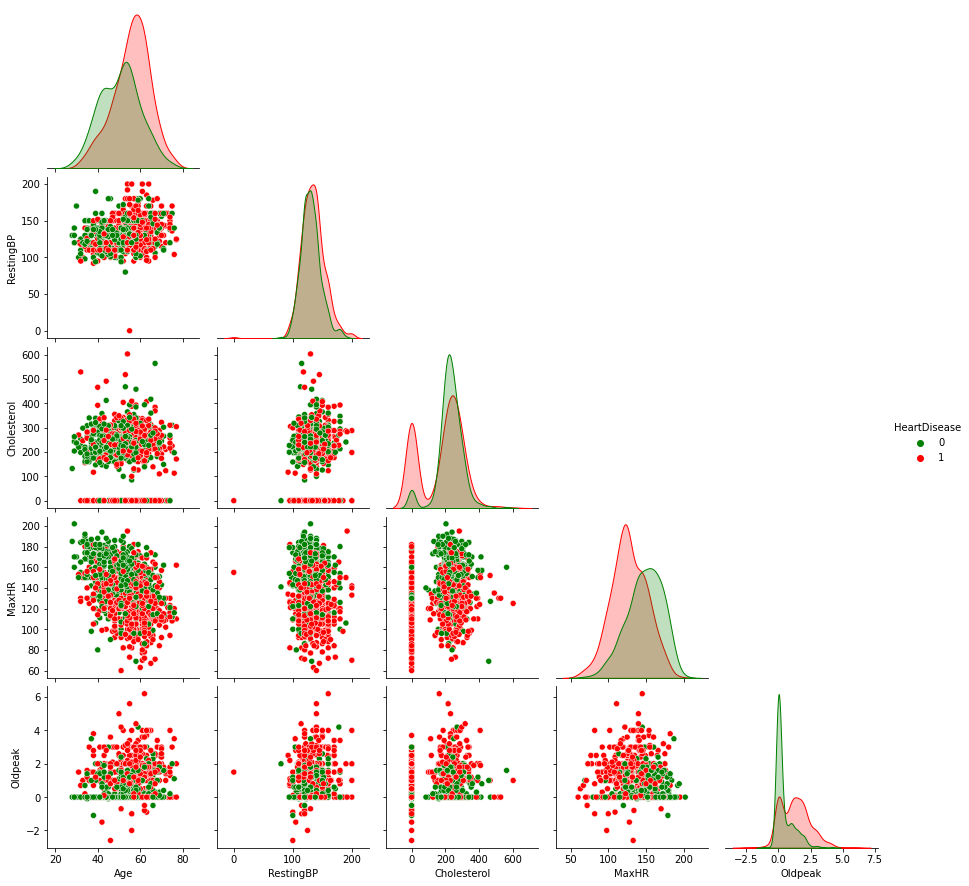

In [122]:
sns.pairplot(data,hue="HeartDisease",
             corner=True,
             palette=sns.color_palette(["green","red"]))


# Preparación de datos
---

## Análisis de datos faltantes e imputaciones
----

Debido a que el conjunto **no presenta datos faltantes**, se procede a evaluar si las variables están en su rango típico (aquellas fuera de rango se considerarían como error), como se podía observar en los gráficos preliminares la variable Cholesterol posee valores en extremo fuera del rango típico (120-600), tras la evaluación se decide eliminar los 179 registros erróneos del dataset, al igual que otras inconsistencias menos notorías (Oldpeak, RestingBP).

In [123]:
# datos fuera de rango
print("Fuera de rango RestingBP : ",data[(data["RestingBP"]<60) | (data["RestingBP"]>200)].shape[0])
print("Fuera de rango Cholesterol : ",data[(data["Cholesterol"]<120) | (data["Cholesterol"]>600)].shape[0])
print("Fuera de rango Oldpeak : ",data[(data["Oldpeak"]<0) | (data["Oldpeak"]>6.2)].shape[0])


Fuera de rango RestingBP :  1
Fuera de rango Cholesterol :  179
Fuera de rango Oldpeak :  13


## Filtros
----

Como se explica en la sección anterior, se filtran los registros con caracterísitcas fuera de rango (escala común).

In [124]:
print("Longitud original:",data.shape[0])

data_fixed = data[(data["RestingBP"]>=60) & (data["RestingBP"]<=200) &
     (data["Cholesterol"]>=120) & (data["Cholesterol"]<=600) & 
     (data["Oldpeak"]>=0) & (data["Oldpeak"]<=6.2)]

print("Registros eliminados:",data.shape[0]-data_fixed.shape[0])
print("Nueva longitud:",data_fixed.shape[0])

Longitud original: 918
Registros eliminados: 180
Nueva longitud: 738


## Agrupaciones
----

In [125]:
data_fixed.groupby(["Sex","HeartDisease"]).agg(["mean","size"]).round(2)

Age      RestingBP      Cholesterol        MaxHR       \
                   mean size      mean size        mean size    mean size   
Sex HeartDisease                                                            
F   0             51.12  142    128.77  142      249.18  142  149.18  142   
    1             56.02   40    143.38   40      279.18   40  139.25   40   
M   0             49.65  245    131.00  245      234.24  245  149.05  245   
    1             55.78  311    135.53  311      248.13  311  129.58  311   

                 Oldpeak       
                    mean size  
Sex HeartDisease               
F   0               0.44  142  
    1               1.47   40  
M   0               0.37  245  
    1               1.45  311

Parece existir una diferencia entre las medias de las variables dado el sexo y si padecen enfermedad cardíaca, se procederá a analizar si realmente son significativas estas diferencias.

## Construccion de tablas pivote y crosstab
----

Tras ver la relación del *MaxHR* por *RestingECG* en el análisis gráfico, se desea ver el valor medio separado por el clasificador principal *HeartDisease*.

In [126]:
data_fixed.pivot_table(index="ChestPainType",columns="HeartDisease",values="MaxHR",aggfunc="mean").round(2)

HeartDisease,0,1
ChestPainType,,
ASY,139.52,128.17
ATA,152.90,141.52
NAP,151.78,134.98
TA,150.50,147.73


* Se puede observar una menor media de "MaxHR" si el paciente padece enfermedad cardíaca, esto, para cada categoría de "ChestPainType".

# Análisis de datos


## Pruebas de correlación
----


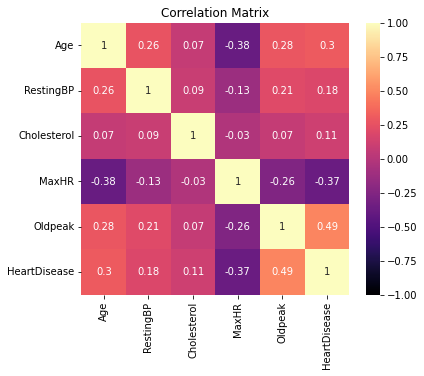

In [127]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.heatmap(data_fixed.corr().round(2),cmap='magma',vmin=-1,annot=True)
ax.set_title("Correlation Matrix");

In [128]:

def tabla_corr_pearson(data_fixed,alfa,umbral):
  newdf = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
  result = []


  for i in newdf.columns:
    for j in newdf.columns:
      if i!=j:
        coef, p = stats.pearsonr(newdf[i], newdf[j])
        result.append([i,j,coef,p < alfa,p])

  correlaciones = pd.DataFrame(result,columns=["Var_i","Var_j","Coef_corr","Correlacionada","p_value"])


  return correlaciones[(correlaciones.Correlacionada==True) & (abs(correlaciones.Coef_corr)>=umbral)].drop_duplicates(["Coef_corr","p_value"])


tabla_corr_pearson(data_fixed,0.05,0.25)

,Var_i,Var_j,Coef_corr,Correlacionada,p_value
0,Age,RestingBP,0.263209,True,3.682124e-13
2,Age,MaxHR,-0.380071,True,8.926298e-27
3,Age,Oldpeak,0.282540,True,5.180863e-15
4,Age,HeartDisease,0.296911,True,1.739944e-16
18,MaxHR,Oldpeak,-0.256683,True,1.439216e-12
19,MaxHR,HeartDisease,-0.374328,True,5.813654e-26
24,Oldpeak,HeartDisease,0.491489,True,3.851994e-46


## Construcción de intervalos de confianza
----

In [129]:
def limite_confianza_por_heartdisease(data, variable, confianza):

  
  limite_inferior_0, limite_superior_0 = sm.stats.DescrStatsW(data.loc[data.HeartDisease==0,variable]).tconfint_mean(alpha = 1-confianza)
  mean_0 = data.loc[data.HeartDisease==0,variable].mean()
  limite_inferior_1, limite_superior_1 = sm.stats.DescrStatsW(data.loc[data.HeartDisease==1,variable]).tconfint_mean(alpha = 1-confianza)
  mean_1 = data.loc[data.HeartDisease==1,variable].mean()
    
  result = pd.DataFrame([[variable,
                          [limite_inferior_0.round(4),mean_0.round(4),limite_superior_0.round(4)],
                          [limite_inferior_1.round(4),mean_1.round(4),limite_superior_1.round(4)]]],
                        columns=["variable","LI media LS hd:0","LI media LS hd:1"])
  return result.round(2)

tabla_medias=pd.DataFrame(columns=["variable","LI media LS hd:0","LI media LS hd:1"])

variables = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.drop("HeartDisease")

for i in variables:
    tabla_medias = tabla_medias.append(limite_confianza_por_heartdisease(data_fixed,i, 0.95))

display(tabla_medias)

,variable,LI media LS hd:0,LI media LS hd:1
0,Age,"[49.2611, 50.1912, 51.1213]","[54.8947, 55.812, 56.7292]"
0,RestingBP,"[128.5664, 130.1835, 131.8005]","[134.5531, 136.4245, 138.2959]"
0,Cholesterol,"[234.2843, 239.7261, 245.1679]","[245.5678, 251.6667, 257.7655]"
0,MaxHR,"[146.7832, 149.1008, 151.4184]","[128.3254, 130.6781, 133.0308]"
0,Oldpeak,"[0.3293, 0.3972, 0.465]","[1.3294, 1.4501, 1.5708]"


> **_Nota:_**  hd: HeartDisease.

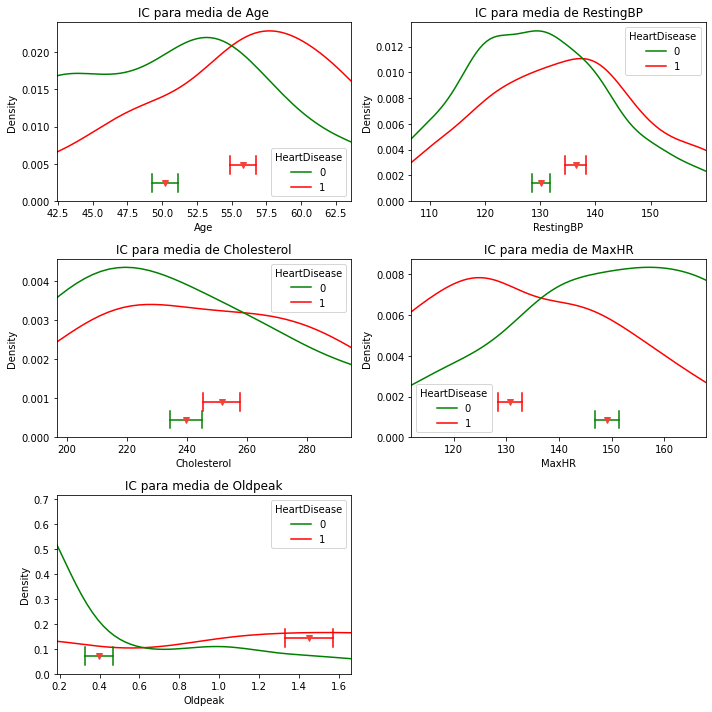

In [130]:
fig,ax = plt.subplots(figsize=(10,10),nrows=3,ncols=2)

n=0
for i in range(3):
    for j in range(2):
        if n < len(variables):    
            lim=limite_confianza_por_heartdisease(data_fixed,variables[n], 0.95)
            sns.kdeplot(ax=ax[i,j],data=data_fixed, x=variables[n],hue="HeartDisease",palette=["green","red"])


            li_0 =lim.iloc[0][1][0]
            med_0 =lim.iloc[0][1][1]
            ls_0 =lim.iloc[0][1][2]

            li_1 =lim.iloc[0][2][0]
            med_1 =lim.iloc[0][2][1]
            ls_1 =lim.iloc[0][2][2]

            centro = (med_0+med_1)/2

            if variables[n]=="Oldpeak":
                ax[i,j].set_xlim([centro*0.20,centro*1.80])
            else:
                ax[i,j].set_xlim([centro*0.80,centro*1.20])

            #intervalo de confianza para hd:0
            color="green"
            ax[i,j].plot([li_0, ls_0], [ax[i,j].get_ylim()[1]*0.1, ax[i,j].get_ylim()[1]*0.1],color=color)
            ax[i,j].plot(med_0, ax[i,j].get_ylim()[1]*0.1, 'v', color='#f44336')
            ax[i,j].plot([li_0, li_0], [ax[i,j].get_ylim()[1]*0.05, ax[i,j].get_ylim()[1]*0.15],color=color)
            ax[i,j].plot([ls_0, ls_0], [ax[i,j].get_ylim()[1]*0.05, ax[i,j].get_ylim()[1]*0.15],color=color)


            #intervalo de confianza para hd:1
            color="red"
            ax[i,j].plot([li_1, ls_1], [ax[i,j].get_ylim()[1]*0.2, ax[i,j].get_ylim()[1]*0.2],color=color)
            ax[i,j].plot(med_1, ax[i,j].get_ylim()[1]*0.2, 'v', color='#f44336')
            ax[i,j].plot([li_1, li_1], [ax[i,j].get_ylim()[1]*0.15, ax[i,j].get_ylim()[1]*0.25],color=color)
            ax[i,j].plot([ls_1, ls_1], [ax[i,j].get_ylim()[1]*0.15, ax[i,j].get_ylim()[1]*0.25],color=color)

            ax[i,j].set_title(f"IC para media de {variables[n]}");
            n+=1

        else:
            ax[i,j].axis("off")

fig.tight_layout()

## Prueba de hipótesis
-----

In [131]:
def test_hipotesis_dos_colas_por_heartdisease(data_fixed,variable):

    Categoria0 = data_fixed.loc[data_fixed.HeartDisease == 0,variable]
    Categoria1 = data_fixed.loc[data_fixed.HeartDisease == 1,variable]

    z, pvalor = sm.stats.ztest(Categoria0, Categoria1,value=0,alternative='two-sided')
    
    return z, pvalor, pvalor<0.05


def diferencia_medias(data):

    data=data_fixed

    result=[]

    columnas_numericas = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.drop("HeartDisease")

    for i in range(len(columnas_numericas)):

        value=test_hipotesis_dos_colas_por_heartdisease(data_fixed,columnas_numericas[i])
        result.append([columnas_numericas[i],value[0],value[1],value[2]])

    result = pd.DataFrame(result,columns=["Variable","z_score","p-value","Significativo"])

    return result.round(4)

print("Diferencia de medias por HeartDisease")
diferencia_medias(data_fixed)

Diferencia de medias por HeartDisease


,Variable,z_score,p-value,Significativo
0,Age,-8.4354,0.000,True
1,RestingBP,-4.9857,0.000,True
2,Cholesterol,-2.8818,0.004,True
3,MaxHR,10.9515,0.000,True
4,Oldpeak,-15.3106,0.000,True


In [132]:
data_fixed.groupby(["HeartDisease"]).agg("mean").round(4)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
HeartDisease,,,,,
0,50.1912,130.1835,239.7261,149.1008,0.3972
1,55.8120,136.4245,251.6667,130.6781,1.4501


In [133]:
def test_hipotesis_una_cola(variable,value,tipo):
    
    z, pvalor = sm.stats.ztest(variable,value=value,alternative=tipo)
    
    return z.round(4), pvalor.round(15), pvalor<0.05


result=[ 
test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"Age"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"Age"].mean(),
                        "smaller"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"RestingBP"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"RestingBP"].mean(),
                        "smaller"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"Cholesterol"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"Cholesterol"].mean(),
                        "smaller"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"MaxHR"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"MaxHR"].mean(),
                        "larger"),

test_hipotesis_una_cola(data_fixed.loc[data_fixed.HeartDisease==0,"Oldpeak"],
                        data_fixed.loc[data_fixed.HeartDisease==1,"Oldpeak"].mean(),
                        "smaller")]

result = pd.DataFrame([["Age hd0 < Age hd1",result[0][0],result[0][1],result[0][2]],
["RestingBP hd0 < RestingBP hd1",result[1][0],result[1][1],result[1][2]],
["Cholesterol hd0 < Cholesterol hd1",result[2][0],result[2][1],result[2][2]],
["MaxHR hd0 > MaxHR hd1",result[3][0],result[3][1],result[3][2]],
["Oldpeak hd0 < Oldpeak hd1",result[4][0],result[4][1],result[4][2]]],
columns=["Hipótesis alterna","z_score","p_value","rechaza H0"])

result

,Hipótesis alterna,z_score,p_value,rechaza H0
0,Age hd0 < Age hd1,-11.8820,0.000000e+00,True
1,RestingBP hd0 < RestingBP hd1,-7.5883,1.600000e-14,True
2,Cholesterol hd0 < Cholesterol hd1,-4.3141,8.012261e-06,True
3,MaxHR hd0 > MaxHR hd1,15.6289,0.000000e+00,True
4,Oldpeak hd0 < Oldpeak hd1,-30.4969,0.000000e+00,True


## Gráficos avanzados
---

In [134]:
variables_numericas = data_fixed.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']).columns.drop("HeartDisease")

variables_categoricas = data.columns[~data.columns.isin(cols_numericas)].drop("HeartDisease")


In [135]:
features = variables_numericas

data_fixed_1=data_fixed.copy()

data_fixed_1["HeartDisease"] = data_fixed_1["HeartDisease"].astype(str)

fig = px.scatter_matrix(
    data_fixed_1,
    dimensions=features,
    color="HeartDisease",
    color_discrete_map={"0": "green", "1": "red"},opacity=0.3
)
fig.update_traces(diagonal_visible=False)

fig.update_layout(
    margin=dict(l=20, r=20, t=0, b=0),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

Tomando la variable "ChestPainType" se pueden observar que existe mayor cantidad de registros para asintomáticos enfermos.


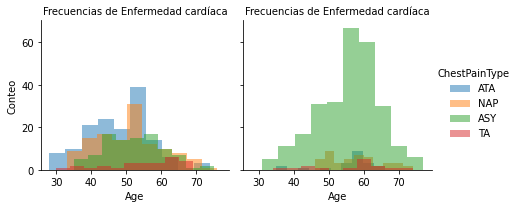

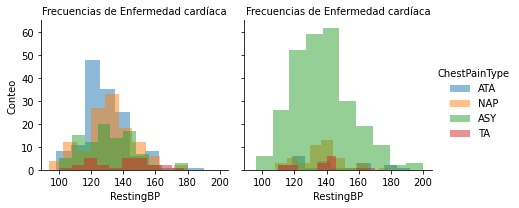

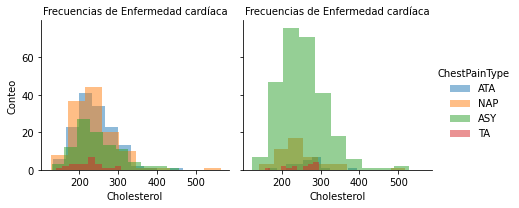

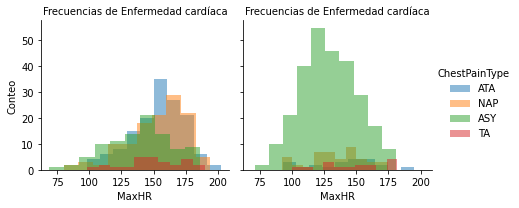

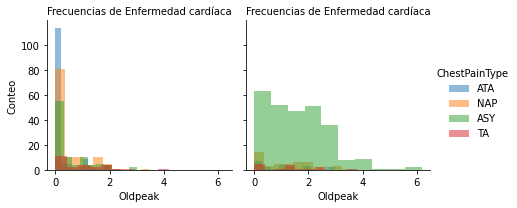

In [136]:
def graficos_comparativos():
    for i in range(len(variables_numericas)):
        variable= variables_numericas[i]
        titanic_sex_dist = sns.FacetGrid(data=data_fixed, col="HeartDisease", hue="ChestPainType" )
        titanic_sex_dist.map(plt.hist, variable, alpha=0.5).add_legend()
        titanic_sex_dist.set_titles("Frecuencias de Enfermedad cardíaca")
        titanic_sex_dist.set_ylabels("Conteo")


    return
graficos_comparativos()

In [137]:

for i in range(len(variables_categoricas)):
    
    plot_2=px.histogram(data_fixed, x=variables_categoricas[i],height=300,width=480,
                  color= "HeartDisease",
                  color_discrete_map={0: "green", 1: "red"},text_auto=True,opacity=0.8)

    plot_2.update_layout(legend=dict(
        orientation="h",
    yanchor="bottom",
    y=0.99,
    xanchor="left",
    x=0.01)) 
    plot_2.show()


In [138]:
for i in range(len(variables_numericas)):
    f=variables_numericas[i]
    plot_1=px.histogram(data_fixed,height=300,width=480,
                 x=f,
                 color= "HeartDisease",
                 color_discrete_map={1: "red", 0: "green"},marginal="rug",opacity=0.8)
    
    plot_1.update_layout(legend=dict(
        orientation="h",
    yanchor="bottom",
    y=0.99,
    xanchor="left",
    x=0.01)) 

    plot_1.show()

## Transformación de variables categóricas a Dummy
---

In [139]:
data_fixed = pd.get_dummies(data=data_fixed, columns=["Sex", "ChestPainType", "FastingBS","RestingECG","ExerciseAngina","ST_Slope"])

## Análisis de regresión y clasificación n-aria 
-----

### Modelo de regresión lineal

In [140]:
all_columns = " + ".join(data_fixed.columns.drop("HeartDisease"))

model_lm = sm.OLS.from_formula(f"HeartDisease ~ {all_columns}", data=data_fixed).fit()
model_lm.summary()
result=model_lm.predict()

data_lm = data_fixed.copy()

data_lm['modelo_lineal']= result
data_lm['predicción']= round(data_lm['modelo_lineal'])
data_lm['acierto']=data_lm['HeartDisease']==data_lm['predicción']

print("Accuracy del modelo lineal: ",data_lm['acierto'].mean().round(4))
print("R^2 del modelo lineal: ",model_lm.rsquared.round(4))


Accuracy del modelo lineal:  0.8672
R^2 del modelo lineal:  0.5784


In [141]:
model_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           HeartDisease   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     66.03
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          2.75e-124
Time:                        19:40:03   Log-Likelihood:                -216.07
No. Observations:                 738   AIC:                             464.1
Df Residuals:                     722   BIC:                             537.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.0072      0.049      0.145      0.885      -0.090       0.104
Age                   0.0030      0.002      2.012      0.045     7.4e-05       0.006
RestingBP             0.0011      0.001      1.511      0.131      -0.000       0.003
Cholesterol           0.0003      0.000      1.284      0.199      -0.000       0.001
MaxHR                -0.0002      0.001     -0.316      0.752      -0.001       0.001
Oldpeak               0.0500      0.015      3.288      0.001       0.020       0.080
Sex_F                -0.0893      0.031     -2.922      0.004      -0.149      -0.029
Sex_M                 0.0964      0.027      3.603      0.000       0.044       0.149
ChestPainType_ASY     0.1608      0.025      6.551      0.000       0.113       0.209
ChestPainType_ATA    -0.0521      0.028     -1.832      0.067      -0.108       0.004
ChestPainType_NAP    -0.0580      0.027     -2.143      0.032      -0.111      -0.005
ChestPainType_TA     -0.0435      0.044     -0.985      0.325      -0.130       0.043
FastingBS_0          -0.0201      0.027     -0.742      0.458      -0.073       0.033
FastingBS_1           0.0273      0.033      0.830      0.407      -0.037       0.092
RestingECG_LVH        0.0142      0.029      0.496      0.620      -0.042       0.071
RestingECG_Normal    -0.0110      0.022     -0.500      0.617      -0.054       0.032
RestingECG_ST         0.0039      0.027      0.144      0.885      -0.050       0.058
ExerciseAngina_N     -0.0729      0.029     -2.510      0.012      -0.130      -0.016
ExerciseAngina_Y      0.0800      0.030      2.650      0.008       0.021       0.139
ST_Slope_Down         0.0192      0.044      0.435      0.664      -0.067       0.106
ST_Slope_Flat         0.1906      0.026      7.424      0.000       0.140       0.241
ST_Slope_Up          -0.2026      0.032     -6.397      0.000      -0.265      -0.140
==============================================================================
Omnibus:                       19.754   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.807
Skew:                          -0.221   Prob(JB):                     2.04e-07
Kurtosis:                       3.898   Cond. No.                     7.67e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Modelo de regresión logística

In [142]:
all_columns = " + ".join(data_fixed.columns.drop("HeartDisease"))

model_log = sm.GLM.from_formula(f"HeartDisease ~ {all_columns}", family=sm.families.Binomial(), data=data_fixed).fit()
model_log.summary()
result=model_log.predict()

data_log = data_fixed.copy()

data_log['modelo_logistico']= result
data_log['predicción']= round(data_log['modelo_logistico'])
data_log['acierto']=data_log['HeartDisease']==data_log['predicción']
accuracy = data_log['acierto'].mean()

print("Accuracy del modelo logístico: ", data_log['acierto'].mean().round(4))



Accuracy del modelo logístico:  0.8686


In [143]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  738
Model:                            GLM   Df Residuals:                      722
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -240.59
Date:                Thu, 23 Mar 2023   Deviance:                       481.17
Time:                        19:40:03   Pearson chi2:                     669.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5190
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.5634      0.495     -3.156      0.002      -2.534      -0.593
Age                   0.0300      0.015      2.015      0.044       0.001       0.059
RestingBP             0.0128      0.007      1.738      0.082      -0.002       0.027
Cholesterol           0.0026      0.002      1.281      0.200      -0.001       0.007
MaxHR                 0.0008      0.006      0.139      0.890      -0.011       0.012
Oldpeak               0.3942      0.141      2.803      0.005       0.119       0.670
Sex_F                -1.7092      0.325     -5.258      0.000      -2.346      -1.072
Sex_M                 0.1458      0.257      0.567      0.570      -0.358       0.649
ChestPainType_ASY     0.8311      0.209      3.972      0.000       0.421       1.241
ChestPainType_ATA    -0.8443      0.294     -2.872      0.004      -1.420      -0.268
ChestPainType_NAP    -0.7624      0.258     -2.954      0.003      -1.268      -0.256
ChestPainType_TA     -0.7878      0.387     -2.035      0.042      -1.547      -0.029
FastingBS_0          -0.9319      0.272     -3.431      0.001      -1.464      -0.400
FastingBS_1          -0.6315      0.322     -1.960      0.050      -1.263   -2.19e-05
RestingECG_LVH       -0.3990      0.279     -1.432      0.152      -0.945       0.147
RestingECG_Normal    -0.6134      0.219     -2.801      0.005      -1.043      -0.184
RestingECG_ST        -0.5511      0.277     -1.993      0.046      -1.093      -0.009
ExerciseAngina_N     -1.2407      0.278     -4.463      0.000      -1.786      -0.696
ExerciseAngina_Y     -0.3227      0.285     -1.132      0.258      -0.881       0.236
ST_Slope_Down        -0.5989      0.397     -1.508      0.132      -1.377       0.180
ST_Slope_Flat         0.7721      0.237      3.251      0.001       0.307       1.238
ST_Slope_Up          -1.7366      0.305     -5.691      0.000      -2.335      -1.138
=====================================================================================
"""

Se opta por estudiar más a fondo el modelo logístico dado que posee una mayor precisión.

Se procede a filtrar las variables, dada su significancia para el modelo seleccionado (logístico).

In [144]:
#capturamos los p values del modelo
p_values = model_log.pvalues
#nos quedamos con los significativos
variables_sig = p_values[p_values<0.05].index.drop("Intercept") #variables significativas para el modelo

all_columns = " + ".join(variables_sig)

model_log = sm.GLM.from_formula(f"HeartDisease ~ {all_columns}", family=sm.families.Binomial(), data=data_fixed).fit()

result=model_log.predict()

data_log = data_fixed.copy()

data_log['modelo_logistico']= result
data_log['predicción']= round(data_log['modelo_logistico'])
data_log['acierto']=data_log['HeartDisease']==data_log['predicción']
accuracy = data_log['acierto'].mean()

print("Accuracy del modelo logístico: ", data_log['acierto'].mean().round(4))
model_log.summary()


Accuracy del modelo logístico:  0.8659


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:                  738
Model:                            GLM   Df Residuals:                      725
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -243.15
Date:                Thu, 23 Mar 2023   Deviance:                       486.31
Time:                        19:40:04   Pearson chi2:                     693.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5157
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.8896      0.572     -1.554      0.120      -2.011       0.232
Age                   0.0327      0.014      2.366      0.018       0.006       0.060
Oldpeak               0.4144      0.139      2.991      0.003       0.143       0.686
Sex_F                -1.7528      0.303     -5.789      0.000      -2.346      -1.159
ChestPainType_ASY     0.9760      0.224      4.357      0.000       0.537       1.415
ChestPainType_ATA    -0.6559      0.298     -2.200      0.028      -1.240      -0.071
ChestPainType_NAP    -0.6292      0.268     -2.347      0.019      -1.155      -0.104
ChestPainType_TA     -0.5806      0.383     -1.515      0.130      -1.332       0.170
FastingBS_0          -0.6428      0.308     -2.090      0.037      -1.246      -0.040
FastingBS_1          -0.2468      0.349     -0.707      0.480      -0.931       0.438
RestingECG_Normal    -0.2434      0.278     -0.874      0.382      -0.789       0.302
RestingECG_ST        -0.1697      0.379     -0.448      0.654      -0.912       0.573
ExerciseAngina_N     -0.9562      0.264     -3.626      0.000      -1.473      -0.439
ST_Slope_Flat         1.3639      0.517      2.641      0.008       0.352       2.376
ST_Slope_Up          -1.1200      0.558     -2.008      0.045      -2.213      -0.027
=====================================================================================
"""

# Conclusiones
----

* La variable clínica que más se relaciona a la presencia de una enfermedad cardíaca (*HeartDisease=1*), es **Oldpeak** (Elevación o Depresión en el electrocardiograma del segmento ST) con un coeficiente de correlación **0.49**. Es decir a mayor Oldpeak es muy probable la presencia de enfermedad cardíaca. 

* Así mismo, la variable MaxHR (frecuencia cardíaca máxima) es *inversamente proporcional* a la presencia de enfermedad cardíaca **(Coef corr -0.37)**, y también a la edad **(Coef corr -0.38)**; es decir, a mayor capacidad cardíaca menor presencia de enfermedad, y, a menor edad mayor capacidad cardíaca.

* Existen diferencias significativas entre la media de las variables comparadas por si padece (*HeartDisease=1*) o no (*HeartDisease=0*) enfermedad cardíaca.

* La reducción de variables independientes que a primera vista no son significativas, redujo el acuraccy en **0.0027** esto puede tener origen en relaciones entre las variables "independientes", por lo tanto queda abierta la posibilidad para estudios de colinealidad, por ende, el modelo final tras la primera depuración contiene las siguientes variables:

    * 'Intercept'
    * 'Age'
    * 'Oldpeak'
    * 'Sex_F'
    * 'ChestPainType_ASY'
    * 'ChestPainType_ATA'
    * 'ChestPainType_NAP'
    * 'ChestPainType_TA'
    * 'FastingBS_0'
    * 'FastingBS_1'
    * 'RestingECG_Normal'
    * 'RestingECG_ST'
    * 'ExerciseAngina_N'
    * 'ST_Slope_Flat'
    * 'ST_Slope_Up'

